# SHAPEFILES
Shapefiles (.shp) are used to store geographic information, they will typically contain the boundaries for geographic regions. The boundaries take the form of a list of points, these boundaries are typically complex and can be simplified through python. The properties for each geographic region are also stored in a dictionary like structure. You may need to use shapefiles when dealing with visualizing geographic data or doing spatial joins, spatial analysis or building spatial indices.

In [1]:
import fiona
from matplotlib import pyplot
import random
from descartes import PolygonPatch

### Set path to the shapefile you want to use

In [2]:
shapefile_path = '../inputs/1270055003_lga_2018_aust_shape/LGA_2018_AUST.shp'

### Read in all polygons
This returns a list of dictionaries, each dictionary representing an LGA (Local Government Area) in Australia.

In [3]:
all_polygons = [polygon for polygon in fiona.open(shapefile_path)]

### There are 562 polygons in the shapefile
Across all of Australia.

In [4]:
len(all_polygons)

562

### Inspecting a single polygon
One polygon has 4 dictionary keys (type, id, properties, geometry). The `properties` contains important information about LGA name, state, area sqkm, lga code, state code. This information is important if we want to visualize the shapefiles. The `geometry` key maps to another dictionary which contains coordinates for the polygon, essentially it is just a list of tuples containing x, y coordinates (or longitude and latitude). The `id` key is self explanatory.

In [7]:
all_polygons[0].keys()

dict_keys(['type', 'id', 'properties', 'geometry'])

In [8]:
all_polygons[0]

{'type': 'Feature',
 'id': '0',
 'properties': OrderedDict([('LGA_CODE18', '10050'),
              ('LGA_NAME18', 'Albury (C)'),
              ('STE_CODE16', '1'),
              ('STE_NAME16', 'New South Wales'),
              ('AREASQKM18', 305.9459)]),
 'geometry': {'type': 'Polygon',
  'coordinates': [[(146.8212997600001, -36.04997231999994),
    (146.82137801600004, -36.04958200699997),
    (146.82187354000007, -36.04976034699996),
    (146.82530702300005, -36.04946099899996),
    (146.82645502000003, -36.04724099899994),
    (146.82625500000006, -36.04576299699994),
    (146.825958, -36.04357999699994),
    (146.82735000000002, -36.03687200799993),
    (146.82775799700005, -36.036926008999956),
    (146.83080202400004, -36.03372399199998),
    (146.83120600600012, -36.03330000899996),
    (146.8312110070001, -36.03329399699993),
    (146.83045501900006, -36.03221999799996),
    (146.83159998700012, -36.02901400299993),
    (146.8320260150001, -36.02885399699994),
    (146.83222300

### Filtering
You may not want to include every single polygon in the shapefile, because this shapefile has an Australia scope, I want to create a new list containing only Victoria polygons. So I will use a list comprehension and filter by the `properties` key where the STE_NAME16 is equal to 'Victoria'.

In [9]:
victoria_polygons = [p for p in all_polygons if p['properties']['STE_NAME16'] == 'Victoria']

### Counting polygons in a shapefile
Note that some of these do not have geometry associated with them. So in the end we actually have 80 polygons, not 82.

In [10]:
len(victoria_polygons)

82

### Gathering the properties dictionary for each LGA in Victoria
Im going to store the properties dictionary from each dictionary in victoria_polygons into a new list of objects.

In [11]:
properties = [prop['properties'] for prop in victoria_polygons]

### Storing the properties in a `pandas.DataFrame`
Since the properties are one of the supported data formats (a list of dictionaries) for pandas we can read it into a DataFrame. We can now use this dataframe to join these properties to other datasets or use it label visualizations.

In [12]:
import pandas

In [13]:
data = pandas.DataFrame(properties)

In [14]:
data.head(10)

,LGA_CODE18,LGA_NAME18,STE_CODE16,STE_NAME16,AREASQKM18
0,20110,Alpine (S),2,Victoria,4788.1568
1,20260,Ararat (RC),2,Victoria,4211.1171
2,20570,Ballarat (C),2,Victoria,739.0321
3,20660,Banyule (C),2,Victoria,62.5402
4,20740,Bass Coast (S),2,Victoria,865.8095
5,20830,Baw Baw (S),2,Victoria,4027.6287
6,20910,Bayside (C),2,Victoria,37.2111
7,21010,Benalla (RC),2,Victoria,2352.6397
8,21110,Boroondara (C),2,Victoria,60.1774
9,21180,Brimbank (C),2,Victoria,123.3991


### Visualizing shapefiles
[Link to code I used for this example](https://sgillies.net/2011/12/22/fiona-and-matplotlib-simply-plotting-features.html)
- First setup the figure
- Then iterate through each polygon
- If it has a geometry information we can plot it
- Generate a random value for now. Linking this data to real data can be done quite easily using the dataframe above (left join to your values dataset by LGA_CODE or LGA_NAME(not recommended))
- Modify the axes to accomodate for the longitude and latitude boundaries

Text(0.5, 1.0, 'Victoria Plot (random data)')

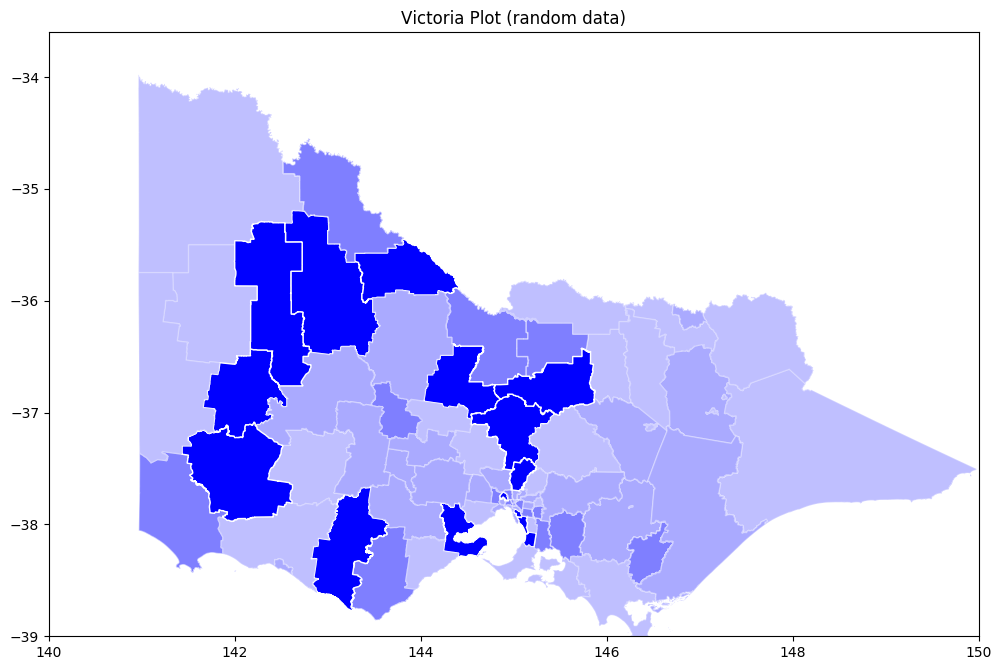

In [21]:
fig = pyplot.figure(1, figsize=(12, 8), dpi=100)
ax = fig.add_subplot(111)

for polygon in victoria_polygons:
    if polygon['geometry']:
        random_value = random.randint(1,4)
        ax.add_patch(PolygonPatch(polygon['geometry'], 
                                  fc='blue', 
                                  ec='white', 
                                  alpha=(1 / random_value)))

ax.set_xlim(140, 150)
ax.set_ylim(-39, -33.6)
ax.set_title('Victoria Plot (random data)')